In [1]:
import pandas as pd

In [18]:
power_usage = pd.read_csv('power_usage.csv')
weather = pd.read_csv('weather_df.csv')

In [19]:
power_usage

,Unnamed: 0,year,month,usage
0,0,2016,1,753434128
1,1,2016,2,756942825
2,2,2016,3,714022910
3,3,2016,4,675078079
4,4,2016,5,630983018
...,...,...,...,...
79,79,2022,8,892014835
80,80,2022,9,806887743
81,81,2022,10,691579483
82,82,2022,11,690524525


In [20]:
weather = weather.drop(['Unnamed: 0'], axis=1)

In [21]:
weather

,year,month,temp,Humidity_mean,rainfall_total,cloud,solar,snow
0,2016,1,0.9,69,49.7,6.0,244.83,13.5
1,2016,2,3.3,60,45.2,4.5,348.22,5.6
2,2016,3,8.4,60,55.2,4.1,520.95,0.0
3,2016,4,15.5,66,185.0,5.8,541.64,0.0
4,2016,5,19.8,65,104.5,5.2,681.60,0.0
...,...,...,...,...,...,...,...,...
79,2022,8,26.9,90,106.4,7.3,454.30,0.0
80,2022,9,23.1,77,89.2,6.2,483.16,0.0
81,2022,10,16.0,65,38.3,4.0,459.57,0.0
82,2022,11,11.8,62,46.7,3.9,336.75,0.0


In [25]:
power_usage = power_usage.drop(['Unnamed: 0'], axis=1)

In [26]:
power_usage

,year,month,usage
0,2016,1,753434128
1,2016,2,756942825
2,2016,3,714022910
3,2016,4,675078079
4,2016,5,630983018
...,...,...,...
79,2022,8,892014835
80,2022,9,806887743
81,2022,10,691579483
82,2022,11,690524525


___날씨 변수 별 전력 사용량___

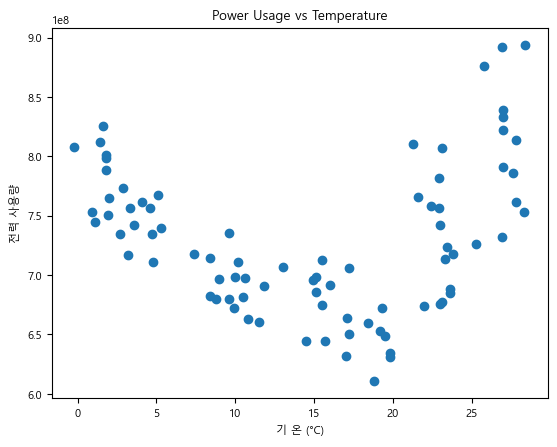

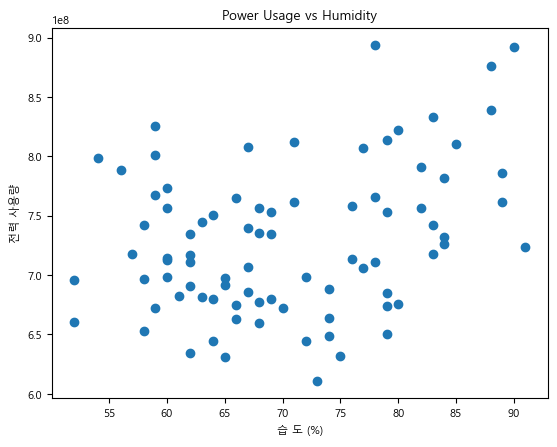

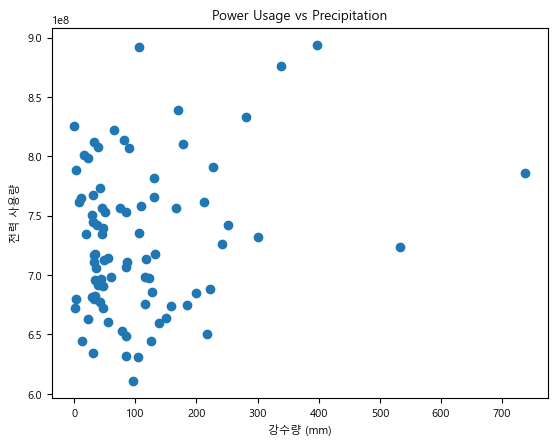

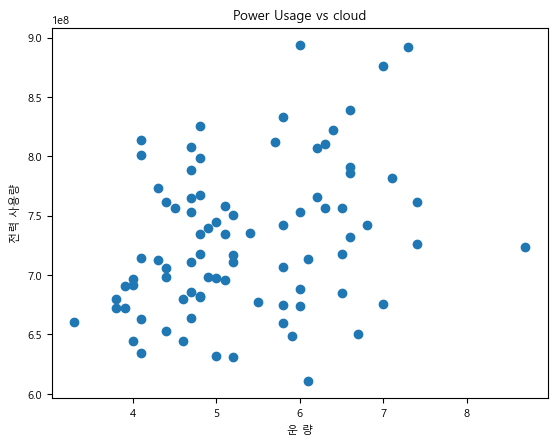

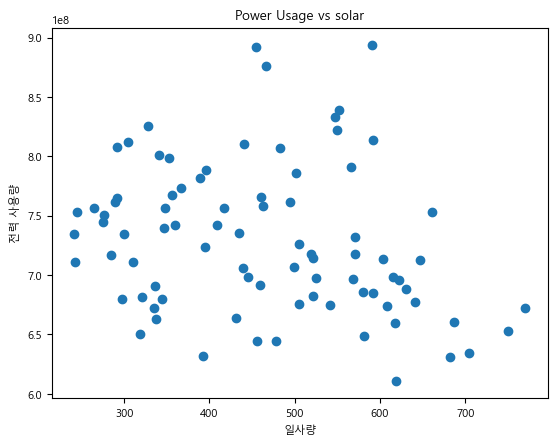

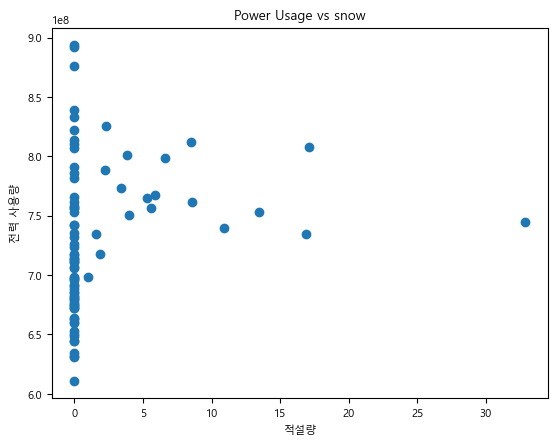

In [49]:
import matplotlib.pyplot as plt
import platform
from matplotlib import font_manager, rc

if platform.system() == 'Windows':  # 현재 운영체제가 Windows인 경우
    # 폰트 파일 경로를 지정
    # 해당 폰트 파일의 이름 호출
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf"
                                            ).get_name()
    # 폰트 이름과 크기를 설정
    rc('font', family=font_name, size=8)

power_usage_df = power_usage

weather_df = weather
# 사용량, 날씨 데이터 머지
merged_df = pd.merge(power_usage, weather)

# 기온, 사용량
plt.scatter(merged_df['temp'], merged_df['usage'])
plt.xlabel('기 온 (°C)')
plt.ylabel('전력 사용량')
plt.title('Power Usage vs Temperature')
plt.show()

# 습도, 사용량
plt.scatter(merged_df['Humidity_mean'], merged_df['usage'])
plt.xlabel('습 도 (%)')
plt.ylabel('전력 사용량')
plt.title('Power Usage vs Humidity')
plt.show()

# 강수량, 사용량
plt.scatter(merged_df['rainfall_total'], merged_df['usage'])
plt.xlabel('강수량 (mm)')
plt.ylabel('전력 사용량')
plt.title('Power Usage vs Precipitation')
plt.show()

# 운량, 사용량
plt.scatter(merged_df['cloud'], merged_df['usage'])
plt.xlabel('운 량')
plt.ylabel('전력 사용량')
plt.title('Power Usage vs cloud')
plt.show()

# 일사량, 사용량
plt.scatter(merged_df['solar'], merged_df['usage'])
plt.xlabel('일사량')
plt.ylabel('전력 사용량')
plt.title('Power Usage vs solar')
plt.show()

# 적설량, 사용량
plt.scatter(merged_df['snow'], merged_df['usage'])
plt.xlabel('적설량')
plt.ylabel('전력 사용량')
plt.title('Power Usage vs snow')
plt.show()

___날씨 변수 시각화___

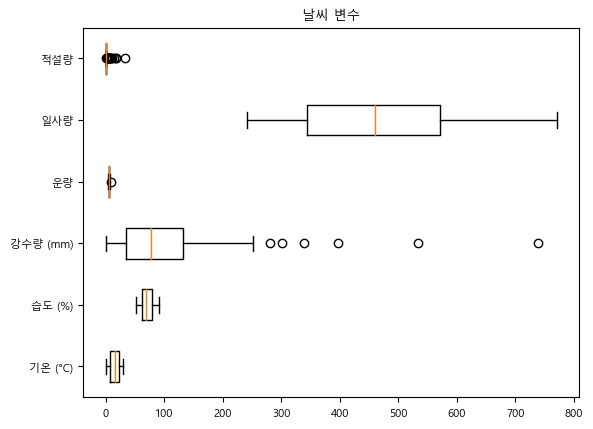

In [57]:
import matplotlib.pyplot as plt
import platform
from matplotlib import font_manager, rc

if platform.system() == 'Windows':  # 현재 운영체제가 Windows인 경우
    # 폰트 파일 경로를 지정
    # 해당 폰트 파일의 이름 호출
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf"
                                            ).get_name()
    # 폰트 이름과 크기를 설정
    rc('font', family=font_name, size=8)


power_usage_df = power_usage
weather_df = weather

# 사용량, 날씨 데이터 머지
merged_df = pd.merge(power_usage, weather)


data = [
    merged_df['temp'],
    merged_df['Humidity_mean'],
    merged_df['rainfall_total'],
    merged_df['cloud'],
    merged_df['solar'],
    merged_df['snow']
]


labels = [
    '기온 (°C)',
    '습도 (%)',
    '강수량 (mm)',
    '운량',
    '일사량',
    '적설량'
]


plt.boxplot(data, labels=labels, vert=False)
plt.xlabel('')
plt.title('날씨 변수')
plt.show()


___기온별 전력 사용량 막대 그래프___

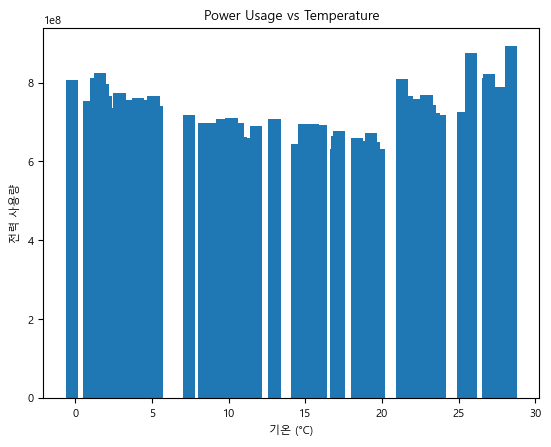

In [60]:
import pandas as pd
import matplotlib.pyplot as plt

# 사용량, 날씨 데이터 머지
merged_df = pd.merge(power_usage, weather)

# 'temp' 컬럼을 기준으로 그룹화하여 'usage' 컬럼의 평균값을 계산하고, 데이터프레임으로 변환
mean_power_usage_by_temp = merged_df.groupby(
    'temp')['usage'].mean().reset_index()

# 막대 그래프를 그리기 위해 'temp'와 'usage' 컬럼을 이용하여 그래프를 작성
plt.bar(mean_power_usage_by_temp['temp'], mean_power_usage_by_temp['usage'])

# x축 레이블 설정
plt.xlabel('기온 (°C)')

# y축 레이블 설정
plt.ylabel('전력 사용량')

# 그래프 제목 설정
plt.title('Power Usage vs Temperature')

# 그래프 출력
plt.show()


___사용량, 기온 선 그래프___

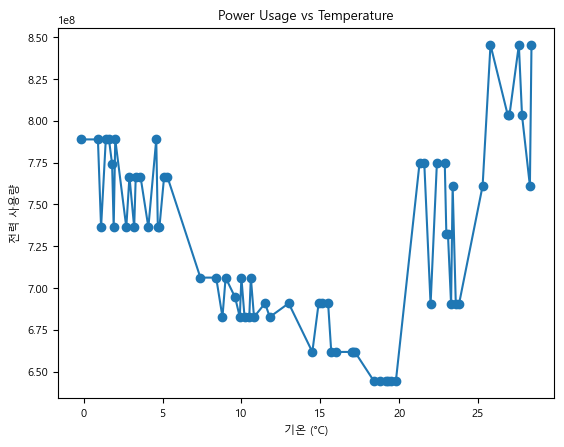

In [63]:
import pandas as pd
import matplotlib.pyplot as plt

# 사용량, 날씨 데이터 머지
merged_df = pd.merge(power_usage, weather)

merged_df = pd.merge(power_usage_df, weather_df, on='month')

mean_power_usage_by_temp = merged_df.groupby('temp')['usage'].mean().reset_index()

plt.plot(mean_power_usage_by_temp['temp'], mean_power_usage_by_temp['usage'], marker='o')
plt.xlabel('기온 (°C)')
plt.ylabel('전력 사용량')
plt.title('Power Usage vs Temperature')
plt.show()


___지도 시각화___

In [9]:
import pandas as pd

usage_2022 = pd.read_excel('2022.xlsx')
usage_2022.columns = usage_2022.iloc[1]
usage_2022 = usage_2022.drop(0)
usage_2022 = usage_2022.drop(1)
usage_2022 = usage_2022.reset_index(drop=True)
usage_2022_T = usage_2022[usage_2022['시도'] == '광주광역시']

def psum(usage):
    # '합 계' 계약종별 데이터만 추출
    usage_df = usage[usage['계약종별'] == '합 계']
    # 불필요한 컬럼 제거
    usage_df = usage_df.drop(['연도', '시도', '계약종별'], axis = True)
    # 인덱스 초기화
    usage_df = usage_df.reset_index(drop = True)

    return usage_df

df_2022 = psum(usage_2022_T)

df_2022_sum = df_2022.iloc[:, 1:13].sum(axis=1)

df = pd.DataFrame({'시군구':['동구', '서구', '북구', '광산구', '남구'],
                             '전력_사용량':df_2022_sum})

df


,시군구,전력_사용량
0,동구,6.521046e+08
1,서구,1.637552e+09
2,북구,2.405994e+09
3,광산구,3.645269e+09
4,남구,7.759513e+08


In [10]:
import json
import folium

state_geo = '행정구역_데이터.json'


with open(state_geo, encoding='utf-8') as file:
    map = json.load(file)

Gwangju = folium.Map(location=[35.1557358, 126.8354271], zoom_start = 11)

ch = folium.Choropleth(

    geo_data=map,

    name='choropleth',

    data=df,

    columns=['시군구', '전력_사용량'], 

    key_on='feature.properties.CTP_KOR_NM',  

    fill_color='YlGn',

    fill_opacity=0.7,

    line_opacity=1,  

    line_weight=1.5,

    line_color='#000',
    # 범례 이름
    legend_name='광주광역시 시도별 전력 사용량',  
).add_to(Gwangju)

Gwangju

제주 지도 시각화 활용

In [130]:
map = folium.Map((35.1557358, 126.8354271),zoom_start = 12)
jsonfile = str(state_geo)
jsondata = json.load(jsonfile)
# jsondata
folium.Choropleth(geo_data=jsondata,
                  data=df,
                  columns=['읍면동','인구수'],
                  key_on='feature.id',
                  legend_name='제주 인구수',
                  bins=10,fill_color='YlOrBr').add_to(map)



# 	키	        인구수
# 0	Jeju	    462396
# 1	Seogwipo	167641

AttributeError: 'str' object has no attribute 'read'

In [32]:
df

,시군구,전력_사용량
0,동구,6.521046e+08
1,서구,1.637552e+09
2,북구,2.405994e+09
3,광산구,3.645269e+09
4,남구,7.759513e+08


In [17]:
import pandas as pd
import folium
from folium.plugins import HeatMap

# 행정 구역을 위한 GeoJSON 데이터 로드 (본인의 파일로 대체)
geojson_data = '행정구역_데이터.json'


# 전력 소비 데이터를 DataFrame으로 읽기
power_df = pd.read_excel('gj_elec_df.csv')

# 전력 소비 값을 색상으로 매핑하는 함수


def map_color(value):
    if value < 2000:
        return '#00FF00'
    elif 2000 <= value < 4000:
        return '#FFFF00'
    else:
        return '#FF0000'


# folium 지도 초기화
m = folium.Map(location=[35.1557358, 126.8354271], zoom_start=10)

# 전력 소비를 위한 Choropleth 레이어 추가
folium.Choropleth(
    geo_data=geojson_data,
    name='Power Consumption',
    data=power_df,
    columns=['area', 'kw'],
    key_on='feature.properties.District',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Power Consumption',
    bins=[0, 2000, 4000, 6000],  # 데이터셋의 전력 소비 값 범위에 따라 이 범위를 조정
    reset=True
).add_to(m)

# Choropleth 레이어를 토글할 수 있는 레이어 컨트롤 추가
folium.LayerControl().add_to(m)

# 지도를 HTML 파일로 저장
m.save('power_consumption_map.html')


ValueError: Excel file format cannot be determined, you must specify an engine manually.

In [31]:
usage_2022 = pd.read_excel('2022.xlsx')

usage_2022.columns = usage_2022.iloc[1]
usage_2022 = usage_2022.drop(0)
usage_2022 = usage_2022.drop(1)
usage_2022 = usage_2022.reset_index(drop=True)


# 2022년도 광주광역시의 사용량 데이터 추출
usage_2022_T = usage_2022[usage_2022['시도'] == '광주광역시']

def psum1(usage):
    # '합 계' 계약종별 데이터만 추출
    usage_df = usage[usage['계약종별'] == '합 계']
    # 불필요한 컬럼 제거
    usage_df = usage_df.drop([ '계약종별'], axis = True)
    # 인덱스 초기화
    usage_df = usage_df.reset_index(drop = True)

    df_ = []
    # 1월부터 12월까지 각각의 합을 리스트에 저장
    for i in range(1, 13):
        df_.append(usage_df[f'{i}월'].sum())

    return df_


def psum2(usage):
    # '합 계' 계약종별 데이터만 추출
    usage_df = usage[usage['계약종별'] == '합 계']
    # 불필요한 컬럼 제거
    usage_df = usage_df.drop([ '계약종별'], axis = True)
    # 인덱스 초기화
    usage_df = usage_df.reset_index(drop = True)

    df_ = []
    # 1월부터 12월까지 각각의 합을 리스트에 저장
    for i in range(1, 13):
        df_.append(usage_df[f'{i}월'].sum())

    return df_



df_2022 = psum(usage_2022_T)

df_2022

[825882846,
 788536591,
 735401195,
 712892007,
 672419479,
 717565017,
 838798578,
 892014835,
 806887743,
 691579483,
 690524525,
 744368423]

In [22]:
import json,folium

jsonfile = open('HangJeongDong_ver20230101.geojson','r',encoding='utf8').read()
jsondata = json.loads(jsonfile)
# jsondata
jsondata_gwangju = {'type': 'FeatureCollection'}
jsondata_pick = []
jsondata_dong = []

Gwangju = 

for idx in jsondata['features']:
    if idx['properties']['sidonm']=='광주광역시':
        dong = idx['properties']['adm_nm'].split()[-1].strip()
        idx['id'] = dong
        jsondata_dong.append(dong)
        jsondata_pick.append(idx)
jsondata_gwangju['features'] = jsondata_pick

In [37]:
jsondata_gwangju['features']

KeyError: 'features'

In [21]:
map = folium.Map(location=[35.1557358, 126.8354271],zoom_start=10)
folium.Choropleth(geo_data=jsondata_gwangju, 
                  data=busan, 
                  columns=['시군구','전력_사용량'], 
                  key_on='feature.id',
                  legend_name='부산인구').add_to(map)

NameError: name 'busan' is not defined

In [36]:
map = folium.Map(location=[35.1557358, 126.8354271], zoom_start=10)
folium.Choropleth(
    geo_data=jsondata_gwangju,
    data=df,
    columns=['시군구', '전력_사용량'],
    key_on='feature.id',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Power Consumption of Gwangju Metropolitan City'
).add_to(map)


KeyError: 'features'